In [1]:
import matplotlib.pyplot as plt
from prep_terrain_data import makeTerrainData
from class_vis import prettyPicture
from datetime import datetime
import numpy as np

In [2]:
t1 = datetime.now()
features_train, labels_train, features_test, labels_test = makeTerrainData()
t2 = datetime.now()
delta = t2 - t1
print(delta.total_seconds())
features_train = np.asarray(features_train, dtype=np.float32)
features_test  = np.asarray(features_test, dtype=np.float32)
print(features_test.shape)

0.04202
(250, 2)


In [3]:
### the training data (features_train, labels_train) have both "fast" and "slow"
### points mixed together--separate them so we can give them different colors
### in the scatterplot and identify them visually
grade_fast = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==0]
bumpy_fast = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==0]
grade_slow = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==1]
bumpy_slow = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==1]

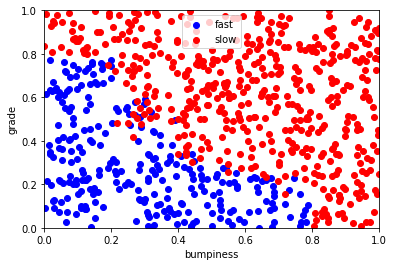

In [4]:
#### initial visualization
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.scatter(bumpy_fast, grade_fast, color = "b", label="fast")
plt.scatter(grade_slow, bumpy_slow, color = "r", label="slow")
plt.legend()
plt.xlabel("bumpiness")
plt.ylabel("grade")
plt.show()

In [5]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
svc=SVC(probability=True, kernel='rbf')
clf = AdaBoostClassifier(n_estimators=50,base_estimator=svc)
t1 = datetime.now()
clf.fit(features_train, labels_train)
t2 = datetime.now()
delta = t2 - t1
print(delta.total_seconds())

4.716531


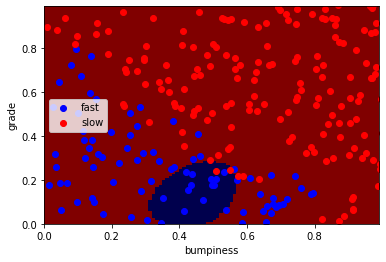

In [6]:
try:
    prettyPicture(clf, features_test, labels_test)
except NameError:
    pass

In [7]:
t1 = datetime.now()
y_pred = clf.predict(features_test)
t2 = datetime.now()
delta = t2 - t1
print(delta.total_seconds())

0.229996


In [8]:
print("Number of mislabeled points out of a total %d points : %d"
      % (features_test.shape[0], (labels_test != y_pred).sum()))

Number of mislabeled points out of a total 250 points : 73


In [9]:
from sklearn.metrics import accuracy_score
scor = accuracy_score(y_pred,labels_test)
scor

0.708